In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
#from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import numpy as np
import lime
from lime import lime_image


In [2]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
import pandas as pd
from keras import models, optimizers, backend
from keras.layers import core, convolutional, pooling
from sklearn import model_selection
#from preprocess.imageSteeringDB import ImageSteeringDB
import cv2
import random

local_project_path = r'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset/'
local_data_path = os.path.join(local_project_path, 'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset')
from tensorflow.keras.utils import Sequence
import matplotlib.image as mpimg

from PIL import Image
import skimage 
from skimage.transform import resize

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder


from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from lime import lime_image

from keras.applications import inception_v3 as inc_net
from keras.applications.imagenet_utils import decode_predictions
from skimage.segmentation import mark_boundaries





In [3]:
image_dataset = r'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset'

In [4]:
# inet_model = inc_net.InceptionV3()

In [5]:
explainer = lime_image.LimeImageExplainer()

checkpoint_path = "C:/Users/Ketan/Thesis/PilotNe/logs/checkpoint/model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [6]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [37]:
class RestoreCkptCallback(keras.callbacks.Callback):
    def __init__(self, pretrained_file):
        self.pretrained_file = pretrained_file
        self.sess = tf.compat.v1.keras.backend.get_session()
        self.saver =  tf.compat.v1.train.Saver(var_list='C:/Users/Ketan/Thesis/PilotNet/logs/checkpoint/model.ckpt')
    def on_train_begin(self, logs=None):
#         if self.pretrain_model_path:
        self.saver.restore(self.sess, self.pretrian_model_path)
        print('load weights: OK.')

In [38]:
restore_ckpt_callback = RestoreCkptCallback('C:/Users/Ketan/Thesis/PilotNet/logs/checkpoint/model.ckpt') 


In [39]:
model = models.Sequential()
model.add(convolutional.Convolution2D(16,3,3, input_shape=(455, 256, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(convolutional.Convolution2D(32, 3, 3, activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(convolutional.Convolution2D(64, 3, 3, activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(core.Flatten())
model.add(core.Dense(500, activation='relu'))
model.add(core.Dropout(.5))
model.add(core.Dense(100, activation='relu'))
model.add(core.Dropout(.25))
model.add(core.Dense(20, activation='relu'))
model.add(core.Dense(1, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04), loss='mean_squared_error',metrics='accuracy')

In [ ]:
from tensorflow.python import pywrap_tensorflow
import os

checkpoint_path = os.path.join('C:/Users/Ketan/Thesis/PilotNet/logs/checkpoint/', "model.ckpt")
reader = tf.compat.v1.train.NewCheckpointReader(checkpoint_path)
var_to_shape_map = reader.get_variable_to_shape_map()

for key in var_to_shape_map:
    print("tensor_name: ", key)
    print(reader.get_tensor(key).shape) # Remove this is you want to print only variable names

In [10]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path)#, target_size=(455, 256))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out) /2 +0.5

AttributeError: 'ModelCheckpoint' object has no attribute 'predict'

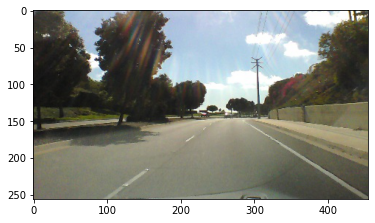

In [11]:
images = transform_img_fn([os.path.join(r'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset/','7654.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
#plt.imshow(images[0] )/ 2 + 0.5
plt.imshow((images[0] * 255).astype(np.uint8))

preds = model.predict(images)
# for x in decode_predictions(preds)[0]:
#     print(x)


In [12]:
image_paths = []
for _, _, files in os.walk(image_dataset):
    for file in files:
        image_paths.append(os.path.join(image_dataset, file))

#images = transform_img_fn(image_paths)
len(image_paths) 


45574

In [13]:
# explanations = []
# for image in images:
#     explanations = explainer.explain_instance(images[0].astype('double'), model.predict, num_samples=1000)


In [14]:
explanations = explainer.explain_instance(images[0].astype('double'), model.predict, num_samples=1000)


AttributeError: 'ModelCheckpoint' object has no attribute 'predict'

In [26]:
temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


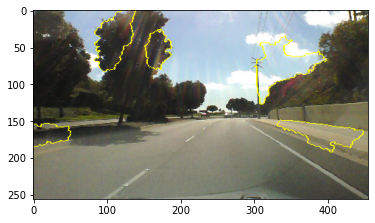

In [27]:
plt.imshow(mark_boundaries(temp , mask))


In [13]:
temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


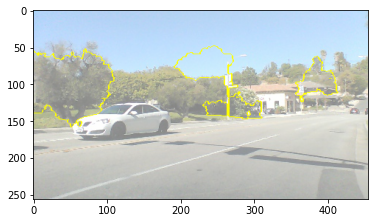

In [14]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
